In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [5]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## Data Preprocessing

In [6]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [7]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [8]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

<Axes: >

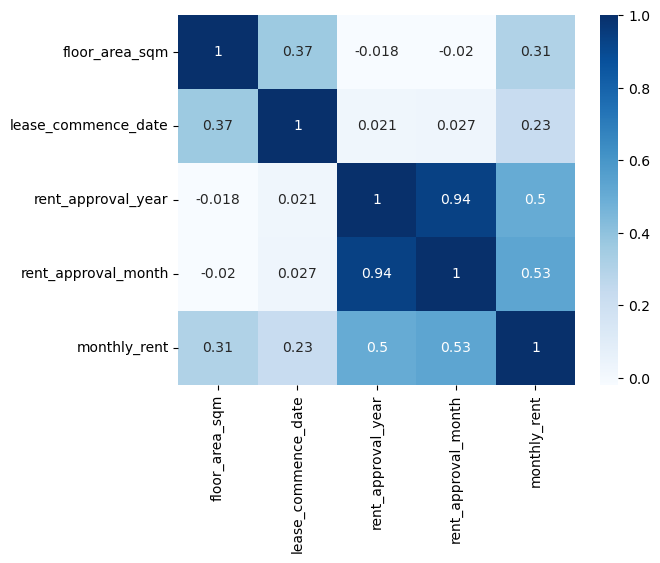

In [9]:
#draw corr heatmap
corr = df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')

c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


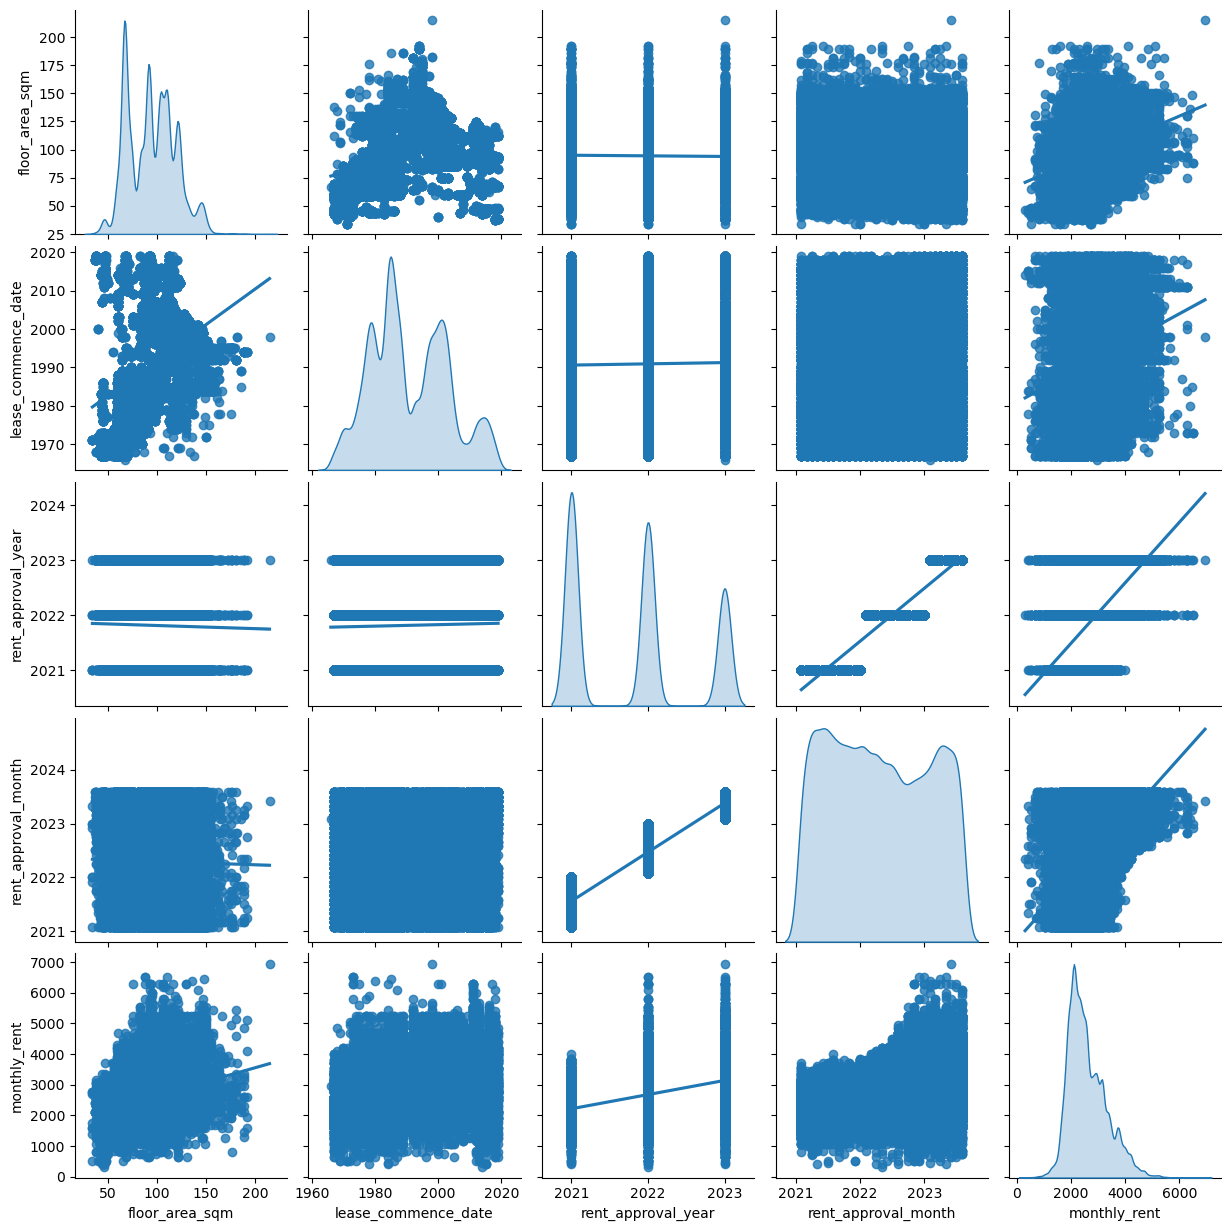

In [10]:
#draw corr distribution plot
sns.pairplot(df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']], diag_kind='kde', kind='reg')


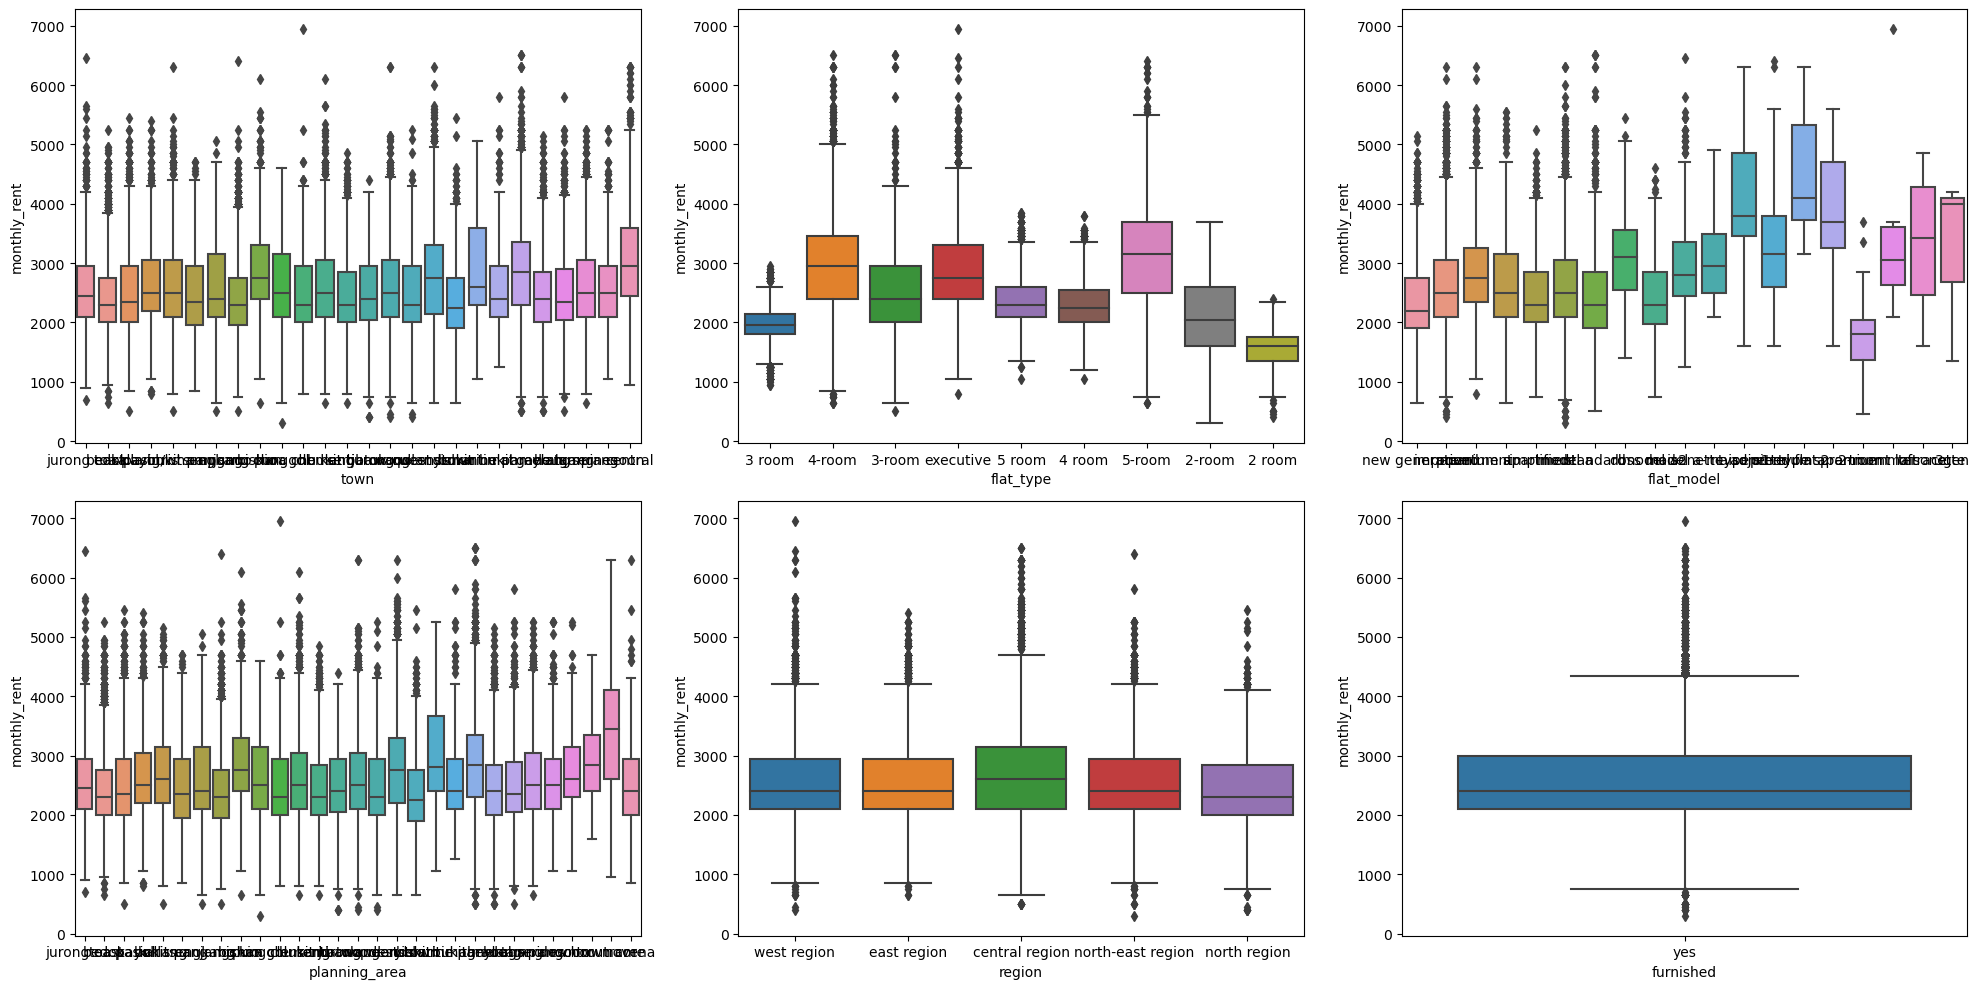

In [11]:
#draw distribution for categorical variables and monthly rent
#town	street_name	flat_type	flat_model	subzone	planning_area	region
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()



In [45]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')

Error in callback <function _draw_all_if_interactive at 0x000001FB64BEA1F0> (for post_execute):


KeyboardInterrupt: 

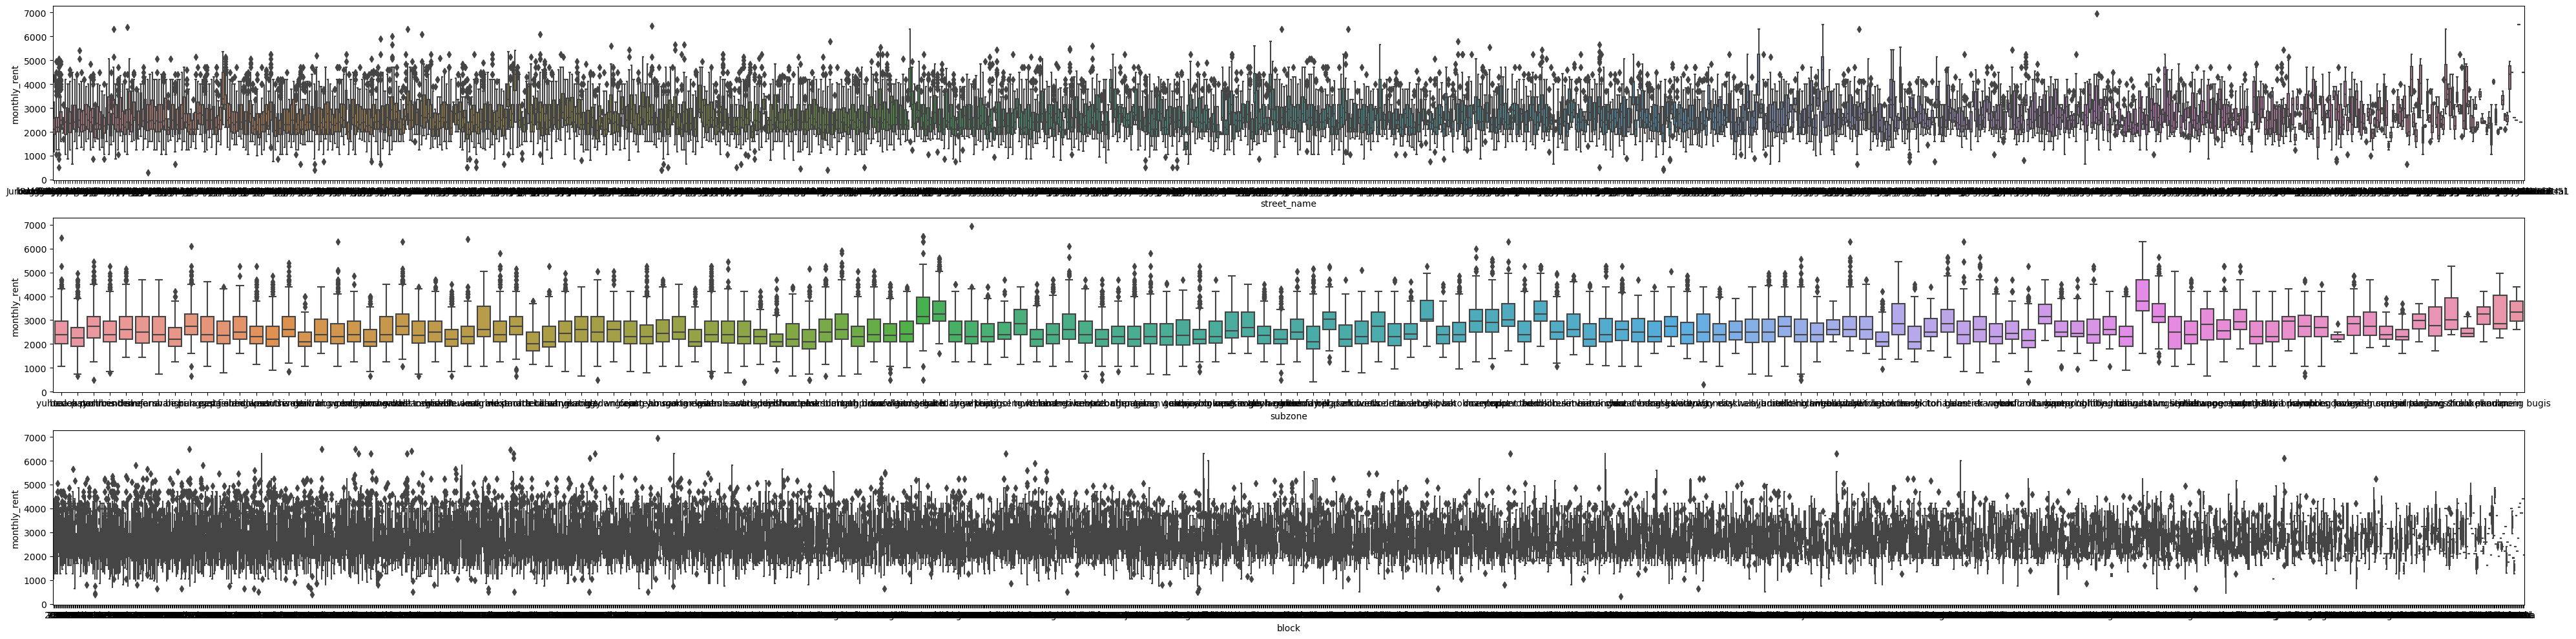

In [44]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
sns.boxplot(x='street_name', y='monthly_rent', data=df_train, ax=ax[0,])
sns.boxplot(x='subzone', y='monthly_rent', data=df_train, ax=ax[1,])
sns.boxplot(x='block', y='monthly_rent', data=df_train, ax=ax[2,])
plt.tight_layout()

In [46]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train.groupby('town')['monthly_rent'].mean()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else grouby_town.mean())

    #map block decrease order
    grouby_block = df_train.groupby('block')['monthly_rent'].mean()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else grouby_block.mean())

    #map flat_type decrease order
    grouby_flat_type = df_train.groupby('flat_type')['monthly_rent'].mean()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else grouby_flat_type.mean())

    #map flat_model decrease order
    grouby_flat_model = df_train.groupby('flat_model')['monthly_rent'].mean()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else grouby_flat_model.mean())

    #map planning_area decrease order
    grouby_planning_area = df_train.groupby('planning_area')['monthly_rent'].mean()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else grouby_planning_area.mean())

    #map region decrease order
    grouby_region = df_train.groupby('region')['monthly_rent'].mean()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else grouby_region.mean())

    #map street_name decrease order
    grouby_street_name = df_train.groupby('street_name')['monthly_rent'].mean()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else grouby_street_name.mean())

    #map subzone decrease order
    grouby_subzone = df_train.groupby('subzone')['monthly_rent'].mean()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else grouby_subzone.mean())

    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())
    

    return df

In [47]:
df_train_map_mean = category_map_mean(df_train)
df_train_map_mean.drop(['elevation'], axis=1, inplace=True)
df_train_map_mean.drop(['furnished'], axis=1, inplace=True)
df_train_map_mean.drop(['rent_approval_date'], axis=1, inplace=True)
#df_train_map_mean.drop(['latitude'], axis=1, inplace=True)
#df_train_map_mean.drop(['longitude'], axis=1, inplace=True)
df_train_map_mean

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent,rent_approval_date_mean
0,2595.146199,2464.285714,2282.692308,1974.144364,2276.033233,67.0,1983,1.344518,103.738630,2542.158516,2595.146199,2569.167537,1600,2233.926780
1,2438.227223,2357.720588,2384.124088,2967.274143,2692.359176,92.0,1978,1.330186,103.938717,2360.371046,2438.227223,2570.667785,2250,2517.128874
2,2516.680515,2428.873239,2402.484472,2486.934831,2276.033233,67.0,1971,1.332242,103.845643,2808.893871,2516.680515,2737.201353,1900,2928.483245
3,2686.857477,2375.714286,2691.237113,2892.857143,2892.857143,149.0,1993,1.370239,103.962894,2610.338573,2686.857477,2570.667785,2850,2249.901768
4,2665.537634,2470.681818,2261.363636,2486.934831,2276.033233,68.0,1972,1.320502,103.863341,2793.525180,2702.635659,2737.201353,2100,2986.739659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2416.700057,2505.714286,2368.501529,1974.144364,2276.033233,67.0,1979,1.366050,103.854168,2390.887097,2416.700057,2558.822710,2200,2233.926780
59996,2904.113924,3850.000000,3512.500000,2967.274143,2692.359176,83.0,2019,1.286493,103.821434,2694.936709,2904.113924,2737.201353,4100,3178.128128
59997,2638.489123,2900.000000,2552.564103,3119.093149,2815.593875,122.0,1988,1.355064,103.936507,2602.823315,2638.489123,2570.667785,2250,2582.606383
59998,2438.227223,2566.981132,2570.967742,3119.093149,2815.593875,123.0,1977,1.318974,103.944076,2434.379786,2438.227223,2570.667785,4700,3069.581639


Index(['town', 'block', 'street_name', 'flat_type', 'flat_model',
       'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'subzone', 'planning_area', 'region', 'monthly_rent',
       'rent_approval_date_mean'],
      dtype='object')

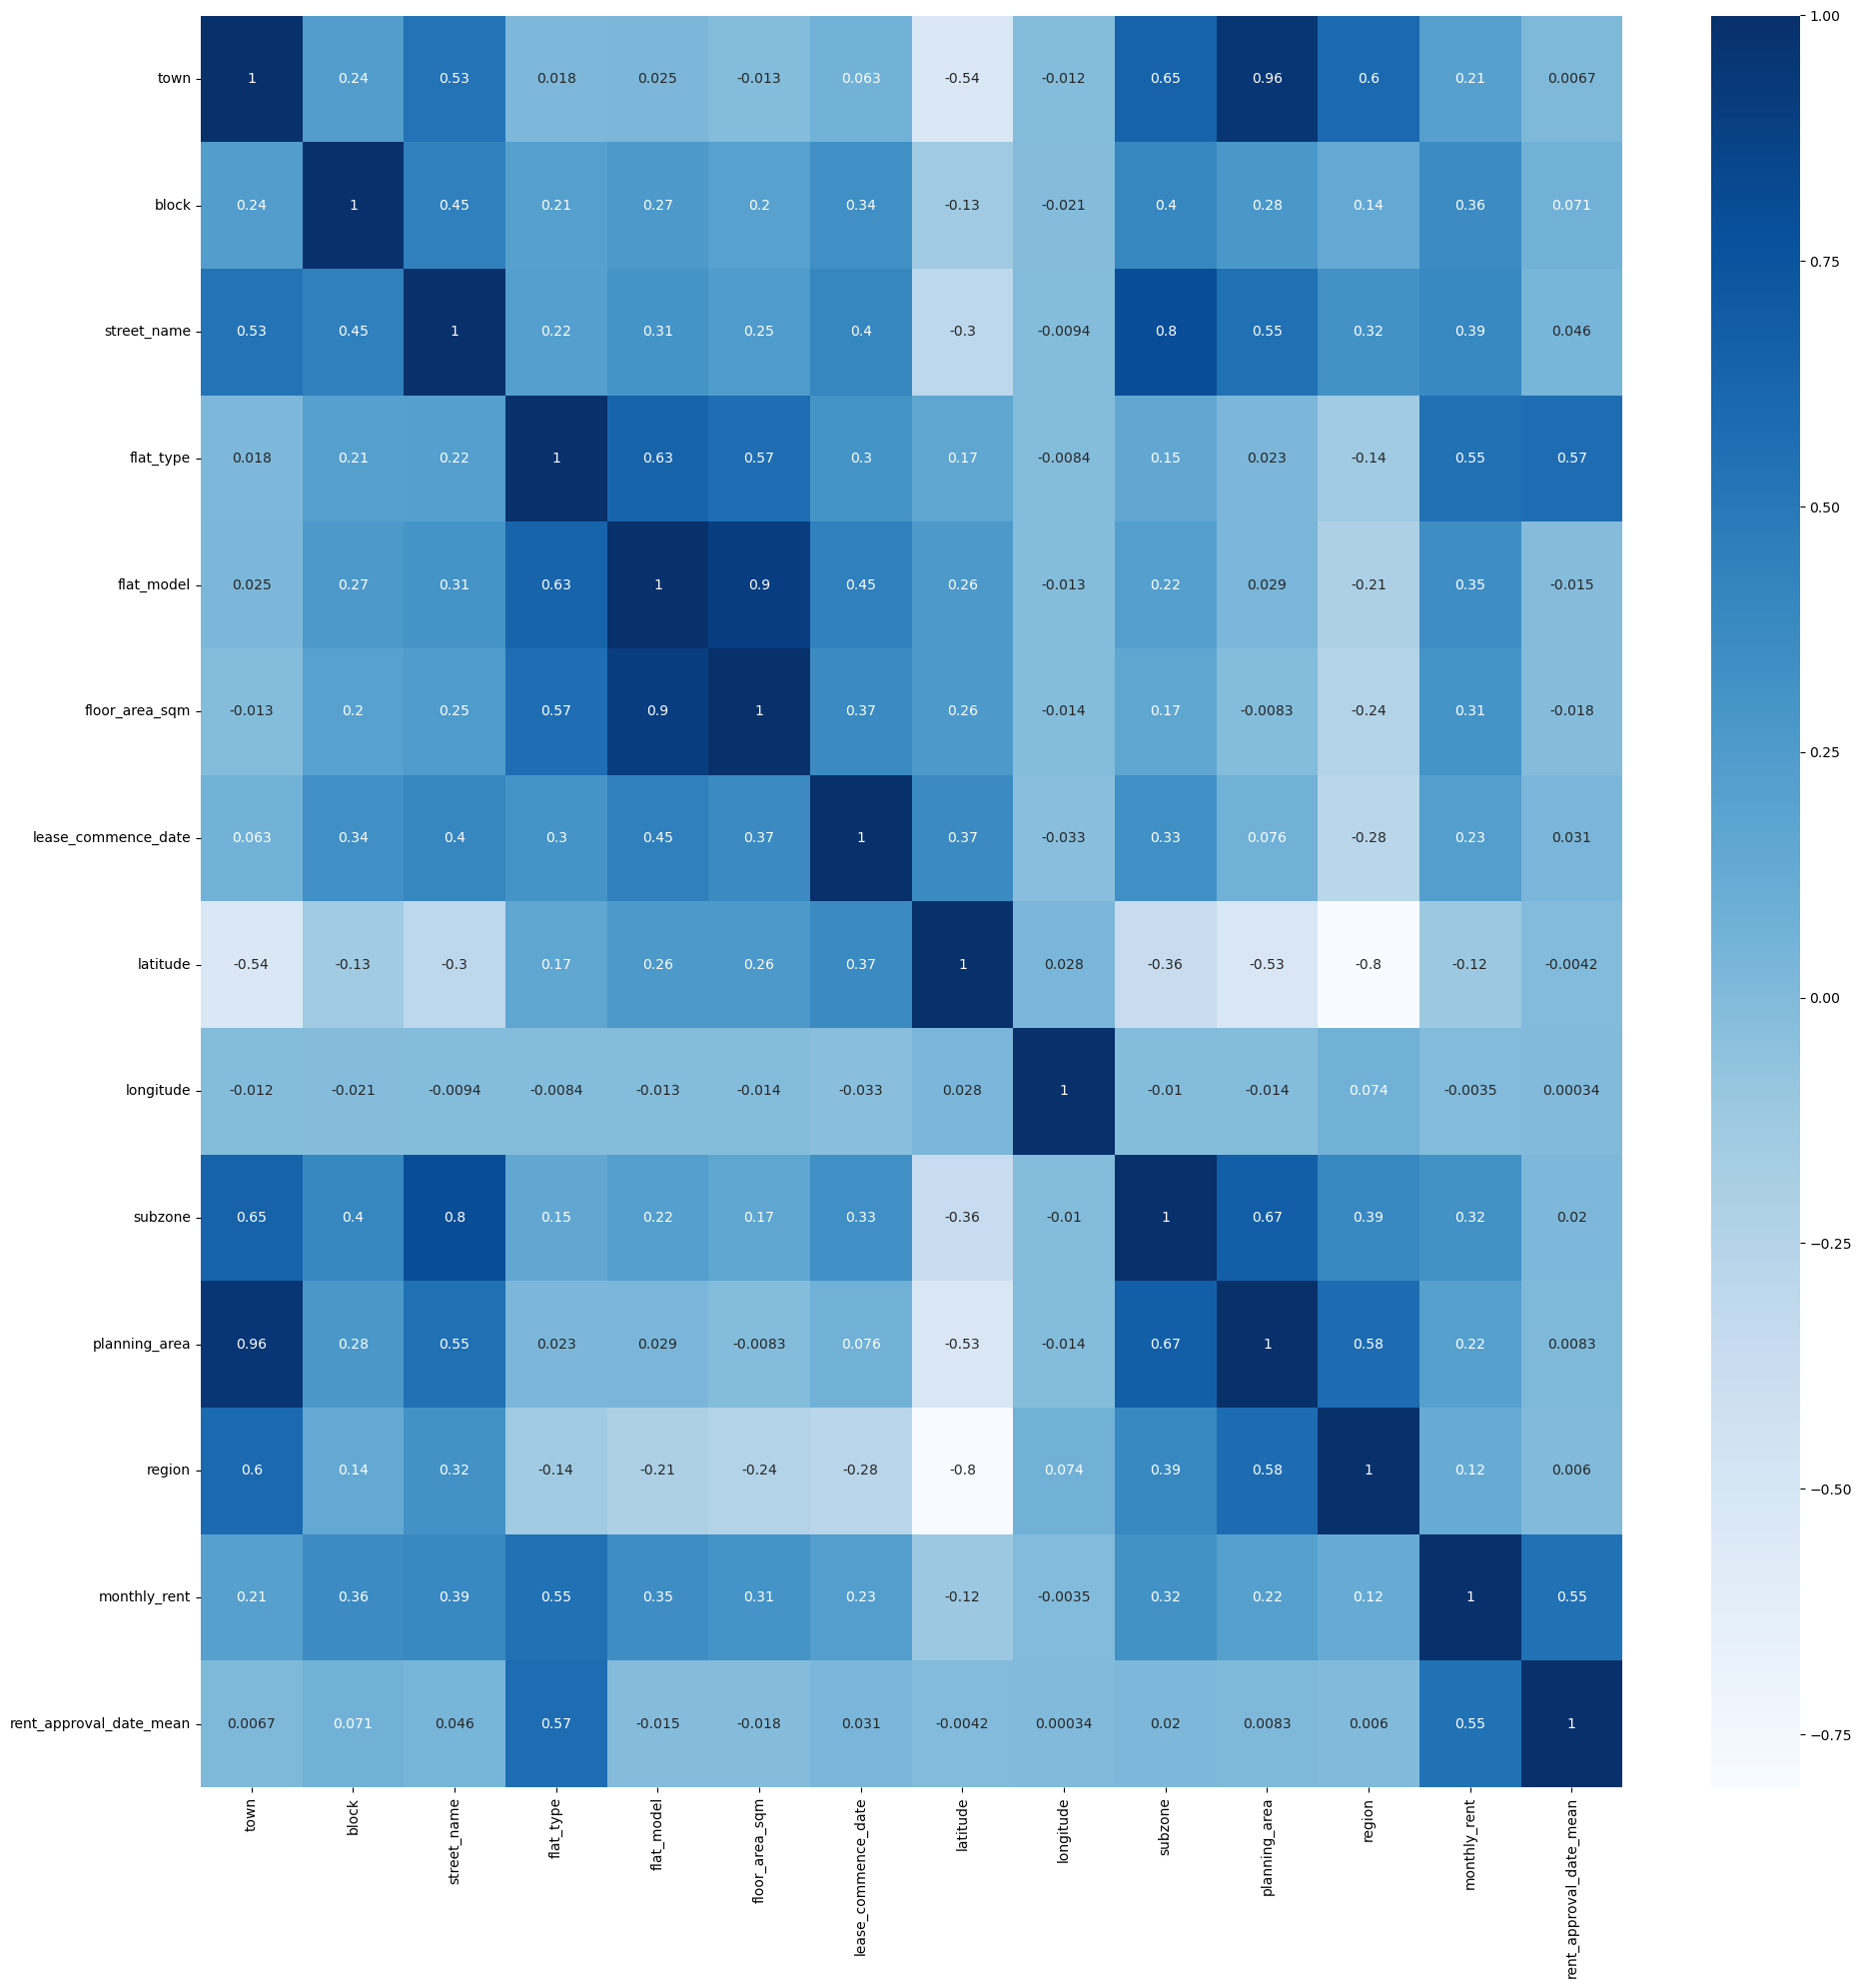

In [48]:
plt.figure(figsize=(20, 20))
corr = df_train_map_mean.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
df_train_map_mean.columns

In [49]:
#draw latitude and longitude on map
import nbformat
print(nbformat.__version__)
fig = px.scatter_geo(df_train_map_mean[:10000], lat='latitude', lon='longitude', color='monthly_rent', hover_name='block', projection='natural earth')
fig.show()


5.9.2


## try with attributes > 0.3
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
## with method
* xgboost
* lgbm

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [51]:
def data_preprocess(df):
    df = df.copy()
    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    df = category_map_mean(df)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df['rent_date'] = pd.to_datetime(df['rent_approval_date']).dt.year + pd.to_datetime(df['rent_approval_date']).dt.month/12
    df.drop(['rent_approval_date'], axis=1, inplace=True)
    
    df = df[['block', 'street_name', 'flat_type', 'floor_area_sqm', 'subzone', 'rent_approval_date_mean']]

    return df

In [40]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [42]:
#count test data has block in train data
df_train_block = df_train['block'].unique()
print(len(df_train_block))
df_test_block = df_test['block']
count = 0
for i in range(len(df_test_block)):
    if df_test_block[i] in df_train_block:
        count += 1
print(count)

2553
29921


In [31]:
df_train_X = data_preprocess(df_train)
#df_train_X = df_train_X.drop(['monthly_rent'], axis=1)
df_train_y = df_train['monthly_rent']
df_test_X = data_preprocess(df_test)
df_test_X

,block,street_name,flat_type,floor_area_sqm,subzone,rent_approval_date_mean
0,2625.000000,2375.000000,3119.093149,121.0,2427.604167,3069.581639
1,2522.916667,2616.666667,2967.274143,100.0,2592.332790,2812.587413
2,2700.000000,2567.261905,2967.274143,91.0,2395.588235,3262.248898
3,2515.333333,2829.629630,1974.144364,74.0,2400.150150,2249.901768
4,2610.215054,2280.416667,3119.093149,121.0,2400.150150,2449.322430
...,...,...,...,...,...,...
29995,2766.666667,2568.143460,2967.274143,92.0,2654.294479,2755.309735
29996,2178.947368,2388.732394,2967.274143,90.0,2473.678647,3103.949406
29997,2464.035088,2264.655172,2486.934831,68.0,2378.606965,3189.212679
29998,2946.153846,2526.829268,2892.857143,144.0,2497.040971,3103.949406


In [32]:
df_train_X

,block,street_name,flat_type,floor_area_sqm,subzone,rent_approval_date_mean
0,2464.285714,2282.692308,1974.144364,67.0,2542.158516,2233.926780
1,2357.720588,2384.124088,2967.274143,92.0,2360.371046,2517.128874
2,2428.873239,2402.484472,2486.934831,67.0,2808.893871,2928.483245
3,2375.714286,2691.237113,2892.857143,149.0,2610.338573,2249.901768
4,2470.681818,2261.363636,2486.934831,68.0,2793.525180,2986.739659
...,...,...,...,...,...,...
59995,2505.714286,2368.501529,1974.144364,67.0,2390.887097,2233.926780
59996,3850.000000,3512.500000,2967.274143,83.0,2694.936709,3178.128128
59997,2900.000000,2552.564103,3119.093149,122.0,2602.823315,2582.606383
59998,2566.981132,2570.967742,3119.093149,123.0,2434.379786,3069.581639


In [33]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [34]:
#cut 30% data as validation set
X_train, X_val, y_train, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=19260817)

MAE:  386.42517851631396
RMSE:  511.77823535560464


<Axes: >

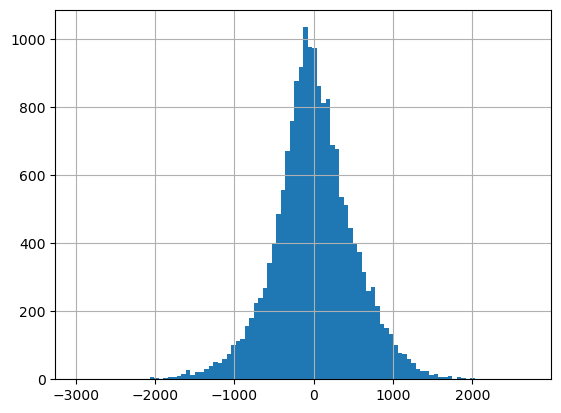

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = GradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 6
[LightGBM] [Info] Start training from score 2586.378571
LGBM MAE:  369.4505640028098
LGBM RMSE:  489.88283632294014


<Axes: >

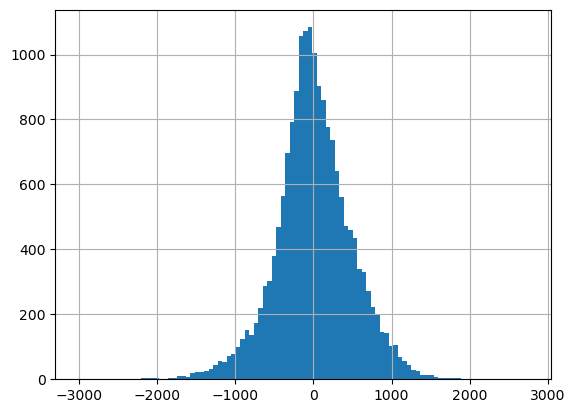

In [35]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=10000,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)



In [ ]:
#submit with xgboost
lgb = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=10000,
)
lgb.fit(df_train_X, df_train_y)
y_pred = lgb.predict(df_test_X)
submit = pd.read_csv(path_prefix + 'example-submission.csv')
submit['Predicted'] = y_pred
submit.to_csv('submit_lgb.csv', index=False)


In [25]:
#feature importance
lgb_model = LGBMRegressor()
features = X_train.columns
dict_feature_importance = {}

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)

original_rmse = mean_squared_error(y_val, y_pred, squared=False)

for feature in features:
    X_train_tmp = X_train.drop([feature], axis=1)
    X_val_tmp = X_val.drop([feature], axis=1)
    lgb_model.fit(X_train_tmp, y_train)
    y_pred = lgb_model.predict(X_val_tmp)
    dict_feature_importance[feature] = mean_squared_error(y_val, y_pred, squared=False) - original_rmse


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 40234, number of used features: 6
[LightGBM] [Info] Start training from score 2515.556495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 40234, number of used features: 5
[LightGBM] [Info] Start training from score 2515.556495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory i

In [26]:
for feature in features:
    print(feature, '\t\t', dict_feature_importance[feature])

block 		 9.022356700334626
street_name 		 1.5255058497397727
flat_type 		 0.11590712983320373
floor_area_sqm 		 0.8644287486536086
subzone 		 4.256996620161146
rent_approval_date_mean 		 43.240753620437886


In [27]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.1, 0.005))
LGBM_RMSE_list = []
for learning_rate in learning_rate_list:
    LGBM = LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(learning_rate_list, LGBM_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 40234, number of used features: 6
[LightGBM] [Info] Start training from score 2515.556495
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 40234, number of used features: 6
[LightGBM] [Info] Start training from score 2515.556495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

KeyboardInterrupt: 

In [ ]:
#tuning with different depth
max_depth_list = list(np.arange(1, 20, 1))
LGBM_RMSE_list = []
for max_depth in max_depth_list:
    LGBM = LGBMRegressor(
        learning_rate=0.01,
        n_estimators=1000,
        max_depth=max_depth
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(max_depth_list, LGBM_RMSE_list)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 6
[LightGBM] [Info] Start training from score 2588.171667
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 6
[LightGBM] [Info] Start training from score 2588.171667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

KeyboardInterrupt: 

In [ ]:
#tuning parameters with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(np.arange(1, 20, 1)),
    'num_leaves': list(np.arange(2, 100, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))


Fitting 5 folds for each of 1862 candidates, totalling 9310 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 12
[LightGBM] [Info] Start training from score 2586.378571
参数的最佳取值:{'max_depth': 9, 'num_leaves': 99}
最佳模型得分:-525.9031647753602
[-609.00453305 -609.00453305 -609.00453305 ... -526.07229843 -526.06197112
 -526.00313521]
[{'max_depth': 1, 'num_leaves': 2}, {'max_depth': 1, 'num_leaves': 3}, {'max_depth': 1, 'num_leaves': 4}, {'max_depth': 1, 'num_leaves': 5}, {'max_depth': 1, 'num_leaves': 6}, {'max_depth': 1, 'num_leaves': 7}, {'max_depth': 1, 'num_leaves': 8}, {'max_depth': 1, 'num_leaves': 9}, {'max_depth': 1, 'num_leaves': 10}, {'max_depth': 1, 'num_leaves': 11}, {'max_depth': 1, 'num_leaves': 12}, {'max_depth': 1, 'num_leaves': 13}, {'

In [ ]:
param_grid = {
    'min_child_samples': list(np.arange(1, 100, 1)),
    'min_child_weight': list(np.arange(0.001, 0.1, 0.001)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=grid_search.best_params_['max_depth'],
    num_leaves=grid_search.best_params_['num_leaves'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

Fitting 5 folds for each of 9801 candidates, totalling 49005 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 12
[LightGBM] [Info] Start training from score 2586.378571
参数的最佳取值:{'min_child_samples': 27, 'min_child_weight': 0.001}
最佳模型得分:-525.7670705146129


In [ ]:
param_grid = {
    'bagging_fraction': list(np.arange(0.5, 1, 0.1)),
    'bagging_freq': list(np.arange(2, 10, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=grid_search.best_params_['min_child_samples'],
    min_child_weight=grid_search.best_params_['min_child_weight'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 12
[LightGBM] [Info] Start training from score 2586.378571
参数的最佳取值:{'bagging_fraction': 0.5, 'bagging_freq': 2}
最佳模型得分:-524.5259579352785


In [ ]:
param_grid = {
    'reg_alpha': list(np.arange(0, 1, 0.1)),
    'reg_lambda': list(np.arange(0, 1, 0.1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=grid_search.best_params_['bagging_fraction'],
    bagging_freq=grid_search.best_params_['bagging_freq'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 12
[LightGBM] [Info] Start training from score 2586.378571
参数的最佳取值:{'reg_alpha': 0.4, 'reg_lambda': 0.0}
最佳模型得分:-524.523652459007


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
LGBM MAE:  421.8853990092359
LGBM RMSE:  568.8284820303877


<Axes: >

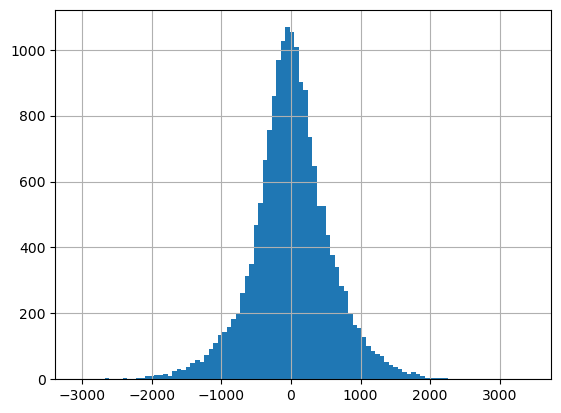

In [ ]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=50000,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=0.5,
    bagging_freq=2,
    reg_alpha=grid_search.best_params_['reg_alpha'],
    reg_lambda=grid_search.best_params_['reg_lambda'],
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

XGB MAE:  360.91164501953125
XGB RMSE:  475.76614589791956


<Axes: >

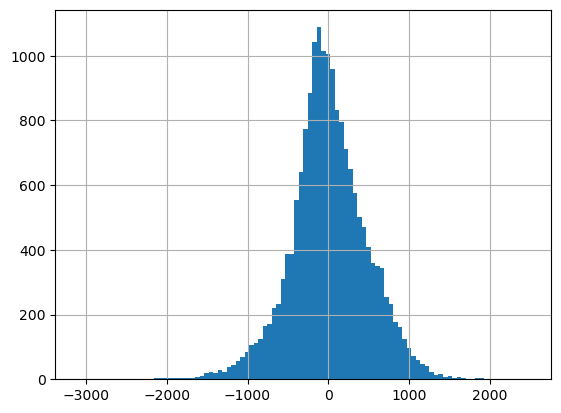

In [ ]:
xgb = XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print('XGB MAE: ', mean_absolute_error(y_val, y_pred))
print('XGB RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

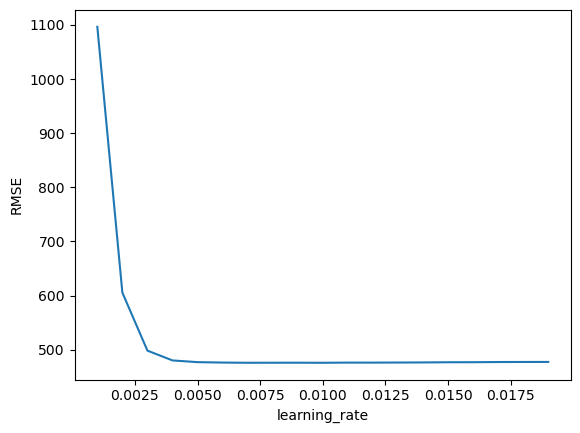

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.02, 0.001))
XGB_RMSE_list = []
for learning_rate in learning_rate_list:
    xgb = XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_val)
    XGB_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.plot(learning_rate_list, XGB_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks


In [ ]:
def build_model(dim, activation='relu', optimizer='adam', loss='mse'):
    model = keras.Sequential([
        layers.Dense(dim, activation=activation, input_shape=[len(df_train_X.columns)]),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [ ]:
model = build_model(1024, activation='softplus', optimizer='adam', loss='mse')

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
)

history = model.fit(
    df_train_X, df_train_y,
    validation_split=0.3,
    epochs=300,
    batch_size=4096,
    callbacks=[early_stopping]
)


Epoch 1/200
12/12 [==============================] - 0s 18ms/step - loss: 242681.7969 - mae: 377.2373 - val_loss: 234221.3594 - val_mae: 369.3957
Epoch 2/200
12/12 [==============================] - 0s 12ms/step - loss: 245132.5938 - mae: 379.5545 - val_loss: 239550.4062 - val_mae: 372.2088
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 243425.9375 - mae: 377.8757 - val_loss: 241261.1875 - val_mae: 376.8472
Epoch 4/200
12/12 [==============================] - 0s 12ms/step - loss: 240905.5938 - mae: 376.2523 - val_loss: 237150.7656 - val_mae: 373.3318
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 240885.3594 - mae: 376.0694 - val_loss: 238878.3438 - val_mae: 371.3596
Epoch 6/200
12/12 [==============================] - 0s 12ms/step - loss: 240137.7031 - mae: 375.0016 - val_loss: 236570.2031 - val_mae: 372.2632
Epoch 7/200
12/12 [==============================] - 0s 12ms/step - loss: 241053.8281 - mae: 376.1886 - val_loss: 234648.812